In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd
from wordcloud import WordCloud

import cv2 as cv
from sklearn.cluster import KMeans

28.042373657226562


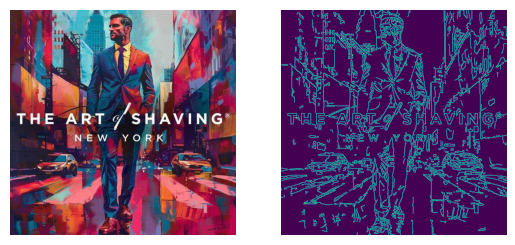

In [49]:
img_path = "data_take_home/athenaclub/tiled/436120960_999477238447206_4061380433769003824_n.jpg"
img_path = "data_take_home/theartofshaving/tiled/436163343_1021277309419932_4326491977803247855_n.jpg"

col_img = cv.imread(img_path)[:,:,::-1]
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img, 100, 200)
print(edges.mean())

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(col_img)
ax1.set_axis_off()
ax2.imshow(edges)
ax2.set_axis_off()

In [44]:
n_clusters = 4
img_path = "data_take_home/theartofshaving/tiled/438173272_309266022224385_1790381397073364288_n.jpg"
img_path = "data_take_home/sweatblock/tiled/342730005_248894200870649_1371951010369086232_n.jpg"

col_img = cv.imread(img_path)
pixels = col_img.reshape(-1, 3)
model = KMeans(n_clusters=n_clusters, n_init='auto')
assignments = model.fit_predict(pixels)
cluster_vars = np.zeros((n_clusters, ))
for k in range(n_clusters):
    cluster = pixels[assignments == k, :]
    center = model.cluster_centers_[k, :]
    dists = np.sum((cluster - center[np.newaxis, :])**2, axis=1)
    cluster_vars[k] = dists.mean()
cluster_vars.sum()

5159.942298818897

In [45]:
reconstructed_img = np.zeros(col_img.shape)
for i in range(4):
    reconstructed_img[assignments.reshape(col_img.shape[0], col_img.shape[1]) == i] = model.cluster_centers_[i]
reconstructed_img = reconstructed_img / 255

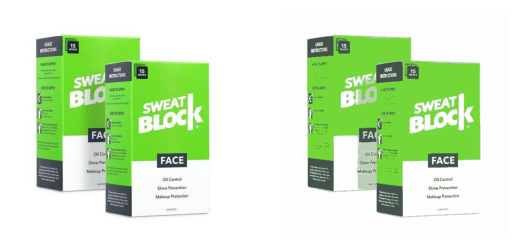

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(col_img[:,:,::-1])
ax1.set_axis_off()
ax2.imshow(reconstructed_img[:,:,::-1])
ax2.set_axis_off()